In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]= 20, 15

import seaborn as sns

In [67]:
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','Budget', 'Year']
print(movies.columns)

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'Budget', 'Year'], dtype='object')


In [68]:
movies.Film = pd.Categorical(movies.Film)
movies.Genre = pd.Categorical(movies.Genre)
movies.Year = pd.Categorical(movies.Year)
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


,Film,Genre,CriticRating,AudienceRating,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


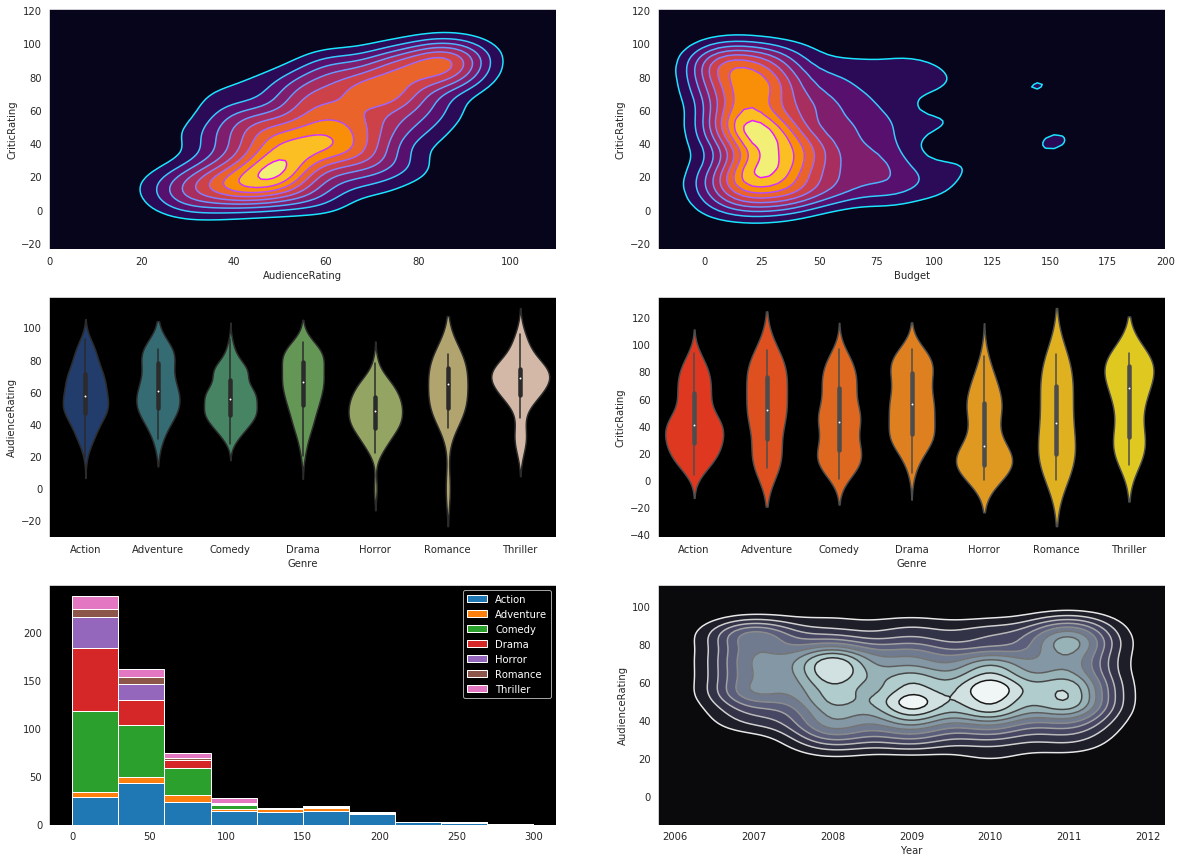

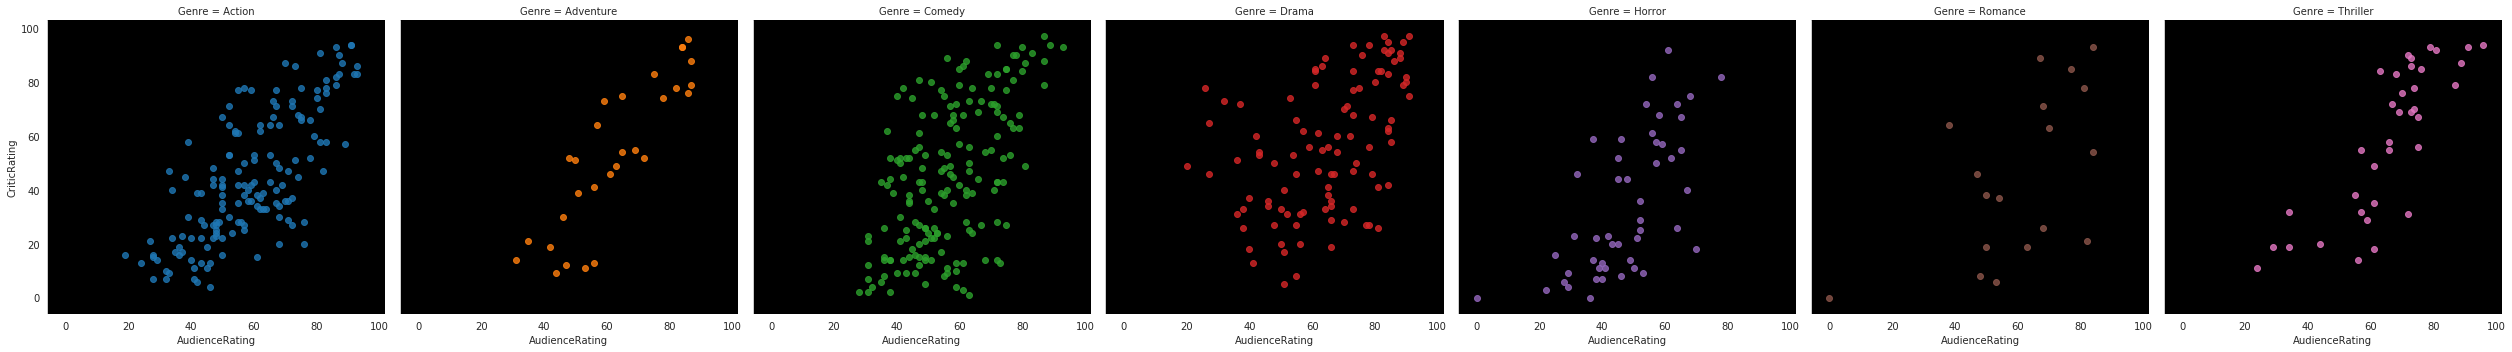

In [191]:
sns.set_style("dark",{"axes.facecolor":"black"})
f, axes  = plt.subplots(3, 2)
#Plot 1 using sns
p1 = sns.kdeplot( movies.AudienceRating, movies.CriticRating, ax=axes[0,0], shade=True, shade_lowest=True, \
                 cmap="inferno", legend=True)
p1b = sns.kdeplot( movies.AudienceRating, movies.CriticRating, ax=axes[0,0], cmap="cool")
p1.set(xlim=(0, 110))
#Plot 2 using sns Kde

p2 = sns.kdeplot(movies.Budget, movies.CriticRating, ax=axes[0,1], shade=True, shade_lowest=True,\
                cmap="inferno", legend=True)
p2b = sns.kdeplot(movies.Budget, movies.CriticRating, ax= axes[0,1], cmap="cool")
p2.set(xlim=(-20, 200))

#Plot 3 using sns
p3 = sns.violinplot(movies.Genre,movies.AudienceRating, ax=axes[1,0], palette="gist_earth",)
    
#Plot 4 using sns violin
p4 = sns.violinplot(movies.Genre,movies.CriticRating, ax=axes[1,1], palette="autumn",)

#plot 5 using sns MATPLOT LIB
li = list()
lab = list()

for gen in movies.Genre.cat.categories:
    li.append(movies[movies.Genre==gen].Budget)
    lab.append(gen)
p5 = axes[2,0].hist(li, stacked=True, label = lab)
axes[2,0].legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
import pylab as pl
l = axes[2,0].legend()
for text in l.get_texts():
    text.set_color("white")

#Plot 6 using sns
p6 = sns.kdeplot(movies.Year, movies.AudienceRating, shade=True, shade_lowest=True ,cmap="bone", ax=axes[2,1])
p6b = sns.kdeplot(movies.Year, movies.AudienceRating, ax=axes[2,1], cmap="gist_gray_r")

#plot 7 using lmplot
p7 = sns.lmplot(data = movies, x = "AudienceRating", y = "CriticRating", col="Genre",hue="Genre",\
                fit_reg=False, height=5)